# Classification using Logistic Regression:

 - If you use _linear regression_ in a classification setting, the predicted y will be a continuous variables and not guaranteed to be between 0 and 1
 - Since we want to ensure that the predicted y is in between 0 and 1 to represent probability of "has_covid", we will use _logistic regression_
 - Further reading: [Difference between linear regression and logistic classifier](https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in the COVID dataset.
data = pd.read_csv("./data/synth_covid.csv")
data.head()

,blood_pressure,lung_capacity,body_temperature,has_covid
0,132.894691,6.931665,39.270112,0
1,117.128239,6.715135,37.005833,1
2,108.982006,6.580677,38.079465,0
3,112.337762,5.482720,37.662576,0
4,113.165263,6.664360,36.922810,1


In [3]:
# Check if there are any NaN values. If so, impute them with the mean of that particular column depending on 
# if the obseration has covid or not.
# Ex: If an observation has a missing value of lung capacity and no COVID, impute the missing value with the mean
# of lung_capacity only of those observations that have COVID.

medians = {}
for column in list(data.drop("has_covid", axis=1).columns):
    medians[column] = {
        0: np.mean(data[data["has_covid"] == 0][column]),
        1: np.mean(data[data["has_covid"] == 1][column])
   }
    
for idx, row in data.iterrows():
    has_covid = row["has_covid"]
    for column in list(data.drop("has_covid", axis=1).columns):
        value = row[column]
        if np.isnan(value):
            data.loc[idx, column] = medians[column][int(has_covid)]

<Axes: xlabel='blood_pressure', ylabel='Count'>

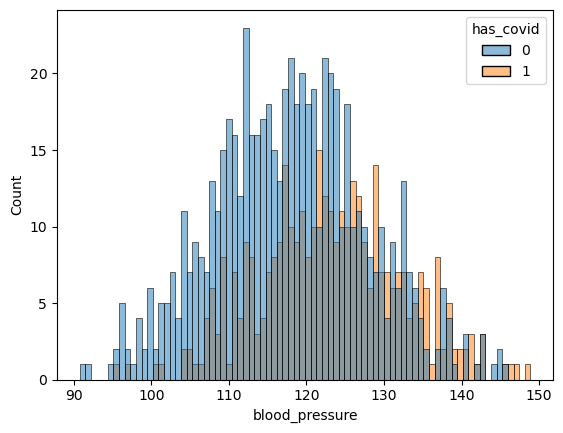

In [4]:
# Using Seaborn, create a histogram of the blood_pressure. Separate this by has_covid.
import seaborn as sns

sns.histplot(
    data = data,
    x = "blood_pressure",
    hue = "has_covid",
    bins=80
)

In [5]:
# What is the distribution of the column has_covid? In other words, how many patients have COVID and don't have COVID.
data["has_covid"].value_counts()

0    636
1    364
Name: has_covid, dtype: int64

In [6]:
# Divide the dataset into an 80/20 training and testing split with a random_state of 42.
from sklearn.model_selection import train_test_split

X = data.drop("has_covid", axis=1)
y = data["has_covid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Define and train/fit a logistic regression model on your dataset.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Get the class prediction of the test set.
class_preds = lr.predict(X_test)

In [9]:
# Get the class probabilities of the test set
class_preds_probs = lr.predict_proba(X_test)

## Metrics
For each of these metrics (Accuracy, Recall, Precision, and F1) and using <i><b>ONLY</b></i> the NumPy library and Pandas, calculate these metrics from scratch. Then, compare this to Scikit-learn's version of these metrics by importing the necessary metric. Are your results similar or different? Why/Why not?

### Accuracy Score
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [10]:
prediction_df = pd.DataFrame()
prediction_df["actual"] = y_test
prediction_df["prediction"] = class_preds


tp = 0
fp = 0
tn = 0
fn = 0

for idx, row in prediction_df.iterrows():
    pred = row["prediction"]
    actual = row["actual"]
    
    if (actual == 1) and (pred == 1):
        tp += 1
    elif (actual == 1) and (pred == 0):
        fn += 1
    elif (actual == 0) and (pred == 0):
        tn += 1
    else:
        fp += 1

        
my_accuracy = (tp + tn) / (tp + tn + fp + fn)

from sklearn.metrics import accuracy_score

print(f"My Accuracy: {my_accuracy}")
print(f"Scikit-Learn Accuracy: {accuracy_score(prediction_df['actual'], prediction_df['prediction'])}")


My Accuracy: 0.695
Scikit-Learn Accuracy: 0.695


### Recall
$$Recall = \frac{TP}{TP + FN}$$

In [11]:
my_recall = (tp) / (tp + fn)

from sklearn.metrics import recall_score

scikit_learn_recall = recall_score(prediction_df['actual'], prediction_df['prediction'])

print(f"My Recall: {my_recall}")
print(f"Scikit-Learn Recall: {scikit_learn_recall}")

My Recall: 0.4125
Scikit-Learn Recall: 0.4125


### Precision
$$Precision = \frac{TP}{TP + FP}$$

In [12]:
my_precision = (tp) / (tp + fp)

from sklearn.metrics import precision_score

scikit_learn_precision = precision_score(prediction_df['actual'], prediction_df['prediction'])

print(f"My Recall: {my_precision}")
print(f"Scikit-Learn Recall: {scikit_learn_precision}")

My Recall: 0.7021276595744681
Scikit-Learn Recall: 0.7021276595744681


### F1-Score
$$F1= 2 * \frac{\large{precision * recall}}{\large{precision + recall}}$$

In [13]:
my_f1 = 2 * ((my_precision * my_recall) / (my_precision + my_recall))

from sklearn.metrics import f1_score

scikit_learn_f1 = f1_score(prediction_df['actual'], prediction_df['prediction'])

print(f"My F1 Score: {my_f1}")
print(f"Scikit-Learn F1 Score: {scikit_learn_f1}")

My F1 Score: 0.5196850393700788
Scikit-Learn F1 Score: 0.5196850393700788


### Theoretical Questions:

1. When testing patients for COVID-19, it is extremely important to capture as many positive cases as possible to understand the prevalence of the virus within a given area. It is very dangerous to misdiagnose someone as not having the virus when in fact they do because they can spread the disease to others without knowing. On the other hand, however, if someone is healthy but diagnosed as having the virus the penalty is they will unnecessarily self-isolate for a few days, which is inconvenient but not as harmful. If this were the case, which metric would you want to maximize? Why?

Recall because we'd rather have false positives (i.e. someone self isolating despite not having the virus) rather than having a false negative (i.e. someone not self isolating and possibly infecting others)

2. Let's say that we're running a zombie task force and our job is to eliminate all zombies via flamethrower (because why not). If zombies are within the general population, let's say that these zombies are able to live freely without infecting anyone else however. We go to a brand new city to do our job and will examine every citizen to check if they are a zombie or not. Because we do not want to put an actual human through this tortorous event and would rather have the zombie live among humans, which metric would be best?

Precision because we'd rather let a zombie live among the living (i.e. false negative) rather than tortue a human being who is actually a zombie (i.e. false positive)

3. Could you give an example of when accuracy might not be the best metric to use?

When the distributions are heavily imbalanced (i.e. 99% class 1 and 1% class 0) since an algorithm predicting everything to belong to class 1 would inherently be very good, which isn't always good.